# Colonel Blotto Project

#### The Colonel Blotto Game
- The Colonel Blotto Game is a simple game that can be played between two players.   
- Each player has 100 indistiguishable knights and need to decide an **arrangement** that place these knights into 10 castles, numbered 1 to 10.  
- A **battle** consists of two players comparing their armies castle by castle. The player who wins the most castles will win the battle and gain 1 point. If they tie, they will each gain 0.5 points.  
- For example, if the two players arrangments are:  

|Castle # |  1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10|
|---------|------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|Player 1| 15  |   15  |  20  |   5   |   0   |  10  |   5   |  20  |  10  |   0|
|Player 2|  3  |      8   |   6  |  13   |  9   |   8    |  1   |   39 |  13    |  0 |
|Player wins| 1| 1 | 1| 2 | 2 | 1 | 1 | 2 | 2 | Tie|

- Therefore, player 1 wins 5 castles, player 2 wins 4 castles. Player 1 wins the battle and gets 1 point from this battle. On the other hand, Player 2 loses the battle and gets 0 point from this battle.
- This description is adopted from Prof.Miles Jones' CSE21 class

#### The Goal of My Project

- Now I get a list of arrangements chosen by some people playing this game -- I will call this the **sample population** later in the code. I propose a knight arrangement, and battles with each of the arrangements in the list, and sum up the score I got from each battle. 
- I'm interested to find an arrangement that gets as high total **score** as possible. 

#### My Algorithm
Of course, I can just check every possible arrangment and find the one with highest score. However, as the size of the game grows (for example, what if I have 1000 knights?), the brute force approach will become less time effecient.  
Instead, I'll implement a "greedy" (not exactly) algorithm that runs as follows:
1. First, initialize so I have at least 2 knights at each castle. Then, choose a percentage. Say, 80%.
2. After that, assign the rest of the knights to castles. Go castle by castle and try to exceed 80% (or the percentage that we chose) of the arrangments on that castle until running out of knights. 

## Package Import



In [1]:
# External packages

import numpy as np
import random, operator, math
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# My classes and functions
sys.path.append('/home/yitang/Project_Sp21/my_module')

from classes import *
from functions import *

In [3]:
# Run unit tests to make sure class and functions works
!pytest

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1
rootdir: /home/yitang/Project_Sp21
collected 4 items                                                              

my_module/test_functions.py ....                                         [100%]

============================== 4 passed in 0.04s ===============================


## Data Import

Now we import the data of a sample population of colonel blotto instances.  
Then, we generate our sample population from the data.

In [4]:
# load data
df = pd.read_csv('./Data/blotto_data.csv')

# example data 
df[:5]

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10
0,17,0,18,16,0,0,16,16,0,17
1,0,14,16,16,0,0,15,14,11,14
2,0,0,16,17,17,17,17,16,0,0
3,2,2,16,16,21,11,2,12,12,6
4,1,16,16,1,16,1,21,6,16,6


In [5]:
# Construct our sample population from data above

sample_population = []

for ind in range(df.shape[0]):
    sample_population.append(CBInstance(list(df.iloc[ind])))

## Running our algorithm on sample_population

The implementation of my algorithm is in functions.py.  
Now it's time to see how well the algorithm works!

In [6]:
testrun_res = perc_greedy(sample_population)
print('The resulting arrangement is: ', testrun_res.get_arr())
print('Its score against sample_population is: ', testrun_res.get_score())

The resulting arrangement is:  [2, 16, 2, 17, 17, 17, 2, 9, 2, 16]
Its score against sample_population is:  55.5


Not bad, huh? `df.shape[0]` gives us 78, which means we earned 55.5 points out of 78 battles!  

A question may come up: our algorithm has a hyperparameter, percentage.    
What is the best value for that, then? 

To answer this question, we run the algorithm on different percentage values.

In [7]:
percentage = range(50,100)
perc_arr_result = []
perc_score_result = []


# Run through different percentage values to collect result data
for perc in percentage:
    current_result = perc_greedy(sample_population, perc)

    perc_arr_result.append(current_result.get_arr())
    perc_score_result.append(current_result.get_score())

In [8]:
# Construct dataframe to better organize collected data
perc_result = pd.DataFrame({'percentage':percentage, 'score':perc_score_result, 
                            'arrangement':perc_arr_result})

perc_result = perc_result.set_index('percentage')

# Example of rows in dataframe
perc_result[:5]

,score,arrangement
percentage,,
50,35.0,"[12, 9, 13, 12, 12, 11, 2, 11, 11, 7]"
51,35.0,"[12, 9, 13, 12, 12, 11, 2, 11, 11, 7]"
52,37.5,"[12, 10, 2, 12, 13, 11, 9, 12, 12, 7]"
53,41.5,"[13, 10, 2, 12, 13, 11, 5, 12, 12, 10]"
54,38.5,"[13, 11, 2, 12, 13, 12, 12, 2, 12, 11]"


## Result Visualization
We plot the scores to get a visual illustration.

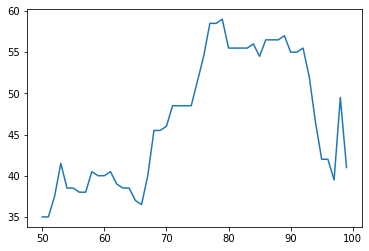

In [9]:
plt.plot(percentage, perc_score_result)
plt.show()

Around 80 looks like a good percentage. Then what if we want to know what value exactly works the best?  
Now we sort the result instances by their score.

In [10]:
perc_result_sorted = perc_result.sort_values(by='score', ascending=False)

# Get the best 5 percentage values
perc_result_sorted[:5]

,score,arrangement
percentage,,
79,59.0,"[2, 16, 2, 17, 17, 16, 2, 10, 2, 16]"
78,58.5,"[2, 15, 2, 17, 17, 16, 2, 11, 2, 16]"
77,58.5,"[2, 15, 2, 17, 17, 16, 2, 11, 2, 16]"
89,57.0,"[4, 17, 2, 18, 2, 18, 2, 18, 2, 17]"
88,56.5,"[2, 16, 2, 18, 18, 18, 2, 5, 2, 17]"


Wow! Looks like 79% works the best! It's earning 59 points against a population of total 78 arrangments, which is pretty good!

#### About this course/project

I won't be appealing for extra credit, since I'm a junior in CS major taking this class for a major requirement that I didn't know before. I feel like the student who didn't have coding experience should earn extra credit if they are able to construct a whole project by themselves.    
However, I just want to say thank you to all the course staff. I wish I had a course like this when I first learnt coding! Have a great summer!

